In [1]:
# from mongoutils import mongo_function
from pymongo import MongoClient
import pandas as pd
from datetime import datetime, timedelta

from scripts.anomaly import AnomalyDetector
from darts.ad import KMeansScorer, QuantileDetector, ThresholdDetector
from darts import TimeSeries
from darts.models import ARIMA, AutoARIMA

In [2]:
df = pd.read_csv('scripts/Sensor1.csv', usecols = ['data','times'])
df

,data,times
0,3.000000,2013-01-01 09:00:00
1,1.155694,2013-01-01 09:00:01
2,4.487984,2013-01-01 09:00:02
3,6.452483,2013-01-01 09:00:03
4,0.076120,2013-01-01 09:00:04
...,...,...
1195,-0.214164,2013-01-01 09:19:55
1196,1.382683,2013-01-01 09:19:56
1197,0.958042,2013-01-01 09:19:57
1198,5.687892,2013-01-01 09:19:58


In [3]:
data = TimeSeries.from_dataframe(df, 'times', ['data'], fill_missing_dates=True, freq='S', fillna_value=0)

In [4]:
train, val = data.split_before(0.6)

In [5]:
train_df = train.pd_dataframe()
val_df = val.pd_dataframe()

In [6]:
model = ThresholdDetector(high_threshold=10)
type(model) == ThresholdDetector

True

In [7]:
anomaly_detector = AnomalyDetector(lag=1, num_models=1)
# anomaly_detector.add_filter(train=train, detector=QuantileDetector(high_quantile=0.99), scorer=KMeansScorer(k=5, window=5))
anomaly_detector.add_filter(train=train, detector=ThresholdDetector(high_threshold=10), scorer=KMeansScorer(k=5, window=5))
binary_anom_array = anomaly_detector.detect_anomalies(val, type="or")

In [8]:
anomaly = val_df[binary_anom_array]
anomaly

component,data
times,
2013-01-01 09:12:08,2.292893
2013-01-01 09:12:09,1.519299
2013-01-01 09:12:10,5.262677
2013-01-01 09:12:11,1.033061
2013-01-01 09:12:12,19.000000
2013-01-01 09:12:35,5.041958
2013-01-01 09:12:36,1.617317
2013-01-01 09:12:37,3.214164
2013-01-01 09:12:38,1.124363


In [9]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(8, 5))
# plt.plot(df[], linestyle="-", linewidth="2", markersize="10", marker=".")
# # plt.plot(com_df[com_df != 0].dropna(how='any'), 'o', c="red")
# plt.show()

In [10]:
all_df = pd.concat([train_df, val_df])
all_df

component,data
times,
2013-01-01 09:00:00,3.000000
2013-01-01 09:00:01,1.155694
2013-01-01 09:00:02,4.487984
2013-01-01 09:00:03,6.452483
2013-01-01 09:00:04,0.076120
...,...
2013-01-01 09:19:55,-0.214164
2013-01-01 09:19:56,1.382683
2013-01-01 09:19:57,0.958042


In [11]:
anomaly

component,data
times,
2013-01-01 09:12:08,2.292893
2013-01-01 09:12:09,1.519299
2013-01-01 09:12:10,5.262677
2013-01-01 09:12:11,1.033061
2013-01-01 09:12:12,19.000000
2013-01-01 09:12:35,5.041958
2013-01-01 09:12:36,1.617317
2013-01-01 09:12:37,3.214164
2013-01-01 09:12:38,1.124363


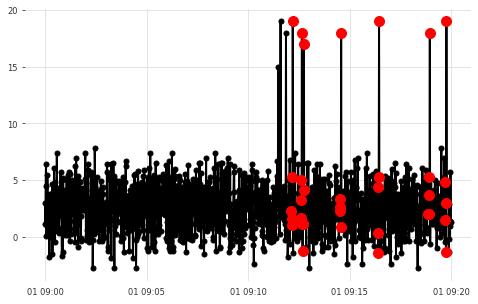

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(all_df['data'], linestyle="-", linewidth="2", markersize="10", marker=".")
plt.plot(anomaly['data'], linestyle="", linewidth="2", markersize="10", marker="o", c="red")